In [1]:
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'


In [2]:
path =''

df = pd.read_csv('./itineraries_new5.csv', sep=',')
df.head()

,weekday,flightDate,startingAirport,destinationAirport,totalFare,segmentsAirlineName,segmentsEquipmentDescription
0,6,04-17,ATL,BOS,248.6,Delta,Airbus A321
1,6,04-17,ATL,BOS,248.6,Delta,Airbus A321
2,6,04-17,ATL,BOS,248.6,Delta,Boeing 757-200
3,6,04-17,ATL,BOS,248.6,Delta,Airbus A321
4,6,04-17,ATL,BOS,248.6,Delta,Airbus A321


In [3]:

""" Create a correspondance between the airport code and an id in a dic object"""
airports = df['startingAirport'].unique()
airports = np.sort(airports)
airports = airports.tolist()
airports_dict = dict()
for i in range(len(airports)):
    airports_dict[airports[i]] = i
print(airports_dict)


""" Create a correspondance between the airline name and an id in a dic object"""
airline_name = df['segmentsAirlineName'].unique()
airline_name = np.sort(airline_name)
airline_name = airline_name.tolist()
airline_name_dict = dict()
for i in range(len(airline_name)):
    airline_name_dict[airline_name[i]] = i
print(airline_name_dict)


""" Create a correspondance between the plane name and an id in a dic object"""
plane_name = df['segmentsEquipmentDescription'].astype(str).unique()
plane_name = np.sort(plane_name)
plane_name = plane_name.tolist()
plane_name_dict = dict()
for i in range(len(plane_name)):
    plane_name_dict[plane_name[i]] = i
print(plane_name_dict)

{'ATL': 0, 'BOS': 1, 'CLT': 2, 'DEN': 3, 'DFW': 4, 'DTW': 5, 'EWR': 6, 'IAD': 7, 'JFK': 8, 'LAX': 9, 'LGA': 10, 'MIA': 11, 'OAK': 12, 'ORD': 13, 'PHL': 14, 'SFO': 15}
{'Alaska Airlines': 0, 'American Airlines': 1, 'Boutique Air': 2, 'Cape Air': 3, 'Contour Airlines': 4, 'Delta': 5, 'Frontier Airlines': 6, 'JetBlue Airways': 7, 'Key Lime Air': 8, 'Southern Airways Express': 9, 'Spirit Airlines': 10, 'Sun Country Airlines': 11, 'United': 12}
{'AIRBUS INDUSTRIE A320 SHARKLETS': 0, 'AIRBUS INDUSTRIE A320 SHARKLETS||': 1, 'AIRBUS INDUSTRIE A320 SHARKLETS||AIRBUS INDUSTRIE A320 SHARKLETS': 2, 'AIRBUS INDUSTRIE A320 SHARKLETS||AIRBUS INDUSTRIE A320 SHARKLETS||': 3, 'AIRBUS INDUSTRIE A320 SHARKLETS||AIRBUS INDUSTRIE A320 SHARKLETS||AIRBUS INDUSTRIE A320 SHARKLETS': 4, 'AIRBUS INDUSTRIE A320 SHARKLETS||AIRBUS INDUSTRIE A320 SHARKLETS||AIRBUS INDUSTRIE A321 SHARKLETS': 5, 'AIRBUS INDUSTRIE A320 SHARKLETS||AIRBUS INDUSTRIE A321 SHARKLETS': 6, 'AIRBUS INDUSTRIE A320 SHARKLETS||AIRBUS INDUSTRIE A32

In [4]:

def extract_month(data):
    return int(data.split("-")[0])

def extract_day(data):
    return int(data.split("-")[1])

df['startingAirport'] = df['startingAirport'].map(airports_dict)
df["destinationAirport"] = df["destinationAirport"].map(airports_dict)
df['segmentsAirlineName'] = df['segmentsAirlineName'].map(airline_name_dict)
df['segmentsEquipmentDescription'] = df['segmentsEquipmentDescription'].map(plane_name_dict)
df["month"] = df['flightDate'].apply(extract_month)
df["day"] = df['flightDate'].apply(extract_day)
df['flightDate'] = pd.to_datetime(df['flightDate'], format='%m-%d')
df["weekday"] = df["weekday"]
df.dropna(inplace=True)



df.head()

,weekday,flightDate,startingAirport,destinationAirport,totalFare,segmentsAirlineName,segmentsEquipmentDescription,month,day
0,6,1900-04-17,0,1,248.6,5,1035.0,4,17
1,6,1900-04-17,0,1,248.6,5,1035.0,4,17
2,6,1900-04-17,0,1,248.6,5,2901.0,4,17
3,6,1900-04-17,0,1,248.6,5,1035.0,4,17
4,6,1900-04-17,0,1,248.6,5,1035.0,4,17


,weekday,startingAirport,destinationAirport,totalFare,segmentsAirlineName,segmentsEquipmentDescription,month,day
0,1.0,0.0,0.066667,0.027272,0.416667,0.196993,0.0,0.533333
1,1.0,0.0,0.066667,0.027272,0.416667,0.196993,0.0,0.533333
2,1.0,0.0,0.066667,0.027272,0.416667,0.552151,0.0,0.533333
3,1.0,0.0,0.066667,0.027272,0.416667,0.196993,0.0,0.533333
4,1.0,0.0,0.066667,0.027272,0.416667,0.196993,0.0,0.533333


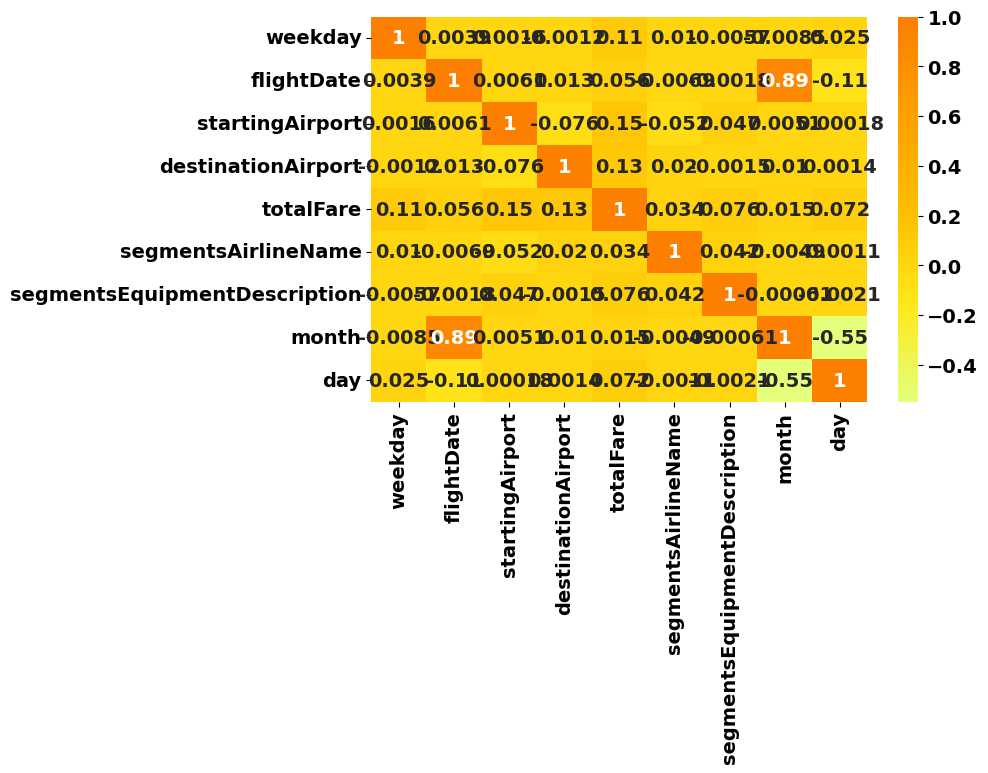

In [5]:
import seaborn as sns #Visualization
from sklearn.preprocessing import MinMaxScaler, StandardScaler

corr = df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);


"""Normalisons les datas"""
""" df["day"] = df["day"]/100
df["month"] = df["month"]/100
df["startingAirport"] = df["startingAirport"]/100
df["destinationAirport"] = df["destinationAirport"]/100
df["totalFare"] = df["totalFare"] / 10000
df["segmentsAirlineName"] = df["segmentsAirlineName"]/100
df["segmentsEquipmentDescription"] = df["segmentsEquipmentDescription"]/1000
df['flightDate_numeric'] = df['flightDate'].astype('int64')
df.drop("flightDate",axis=1) """


# Normalize numerical columns using MinMaxScaler
scaler = MinMaxScaler()

df['day'] = scaler.fit_transform(df[['day']])
df['month'] = scaler.fit_transform(df[['month']])
df['totalFare'] = scaler.fit_transform(df[['totalFare']])
df['weekday'] = scaler.fit_transform(df[['weekday']])

# Mapping and Normalizing categorical features
df['startingAirport'] = df['startingAirport'] / df['startingAirport'].max()
df['destinationAirport'] = df['destinationAirport'] / df['destinationAirport'].max()
df['segmentsAirlineName'] = df['segmentsAirlineName'] / df['segmentsAirlineName'].max()
df['segmentsEquipmentDescription'] = df['segmentsEquipmentDescription'] / df['segmentsEquipmentDescription'].max()

# Drop original flightDate
df = df.drop("flightDate", axis=1)


df.head()


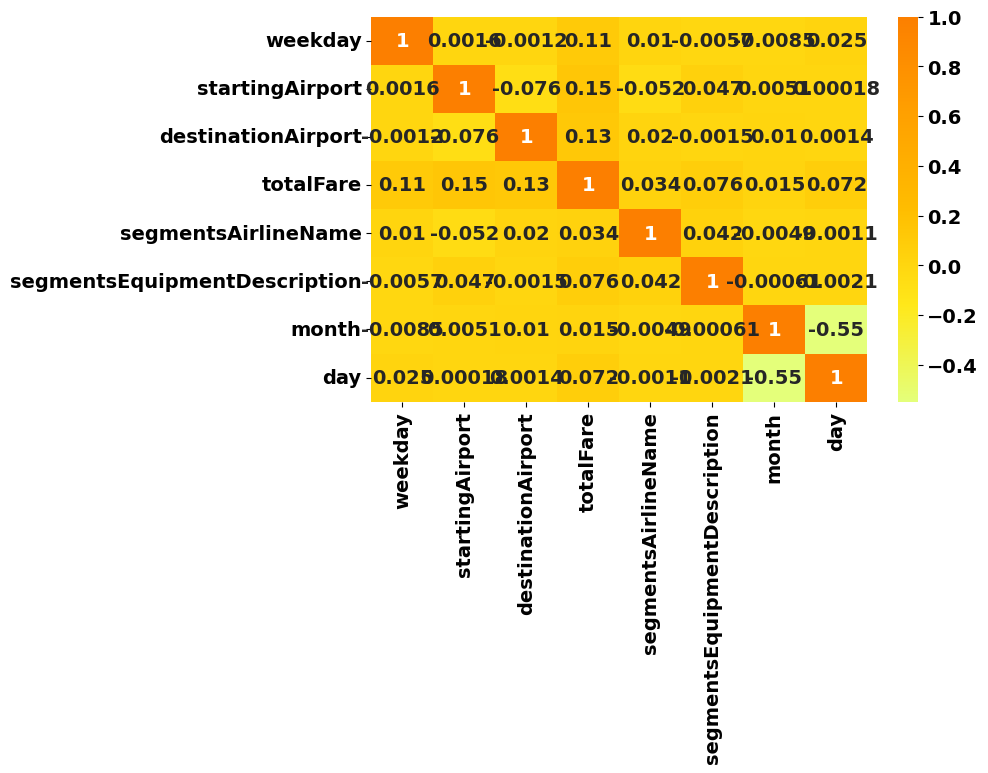

In [6]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Diviser les données en ensemble de formation et de test
X = df[['weekday','startingAirport', 'destinationAirport',"segmentsAirlineName","segmentsEquipmentDescription"]]
y = df['totalFare']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer un modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)
# Calculer l'erreur quadratique moyenne
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)



R-squared Score: 0.058865459950375176
Mean Squared Error: 0.0006046865690295186


In [8]:
from sklearn.metrics import explained_variance_score
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest regressor model
rf_model = RandomForestRegressor(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Calculate R-squared score
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest R-squared Score:", r2_rf)

# Calculate mean squared error
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Mean Squared Error:", mse_rf)


Random Forest R-squared Score: 0.7637069480731482
Random Forest Mean Squared Error: 0.0001518202008053257


In [9]:
import joblib

#  Export the model
model_filename = 'random_forest_model.joblib'
joblib.dump(rf_model, model_filename)
print(f"Model saved to {model_filename}")

Model saved to random_forest_model.joblib


In [10]:
from sklearn.linear_model import Lasso

# Create a Lasso regression model
lasso_model = Lasso(alpha=0.1, random_state=42)  # You can adjust the alpha parameter for tuning

# Train the model on the training data
lasso_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lasso = lasso_model.predict(X_test)

# Calculate R-squared score
r2_lasso = r2_score(y_test, y_pred_lasso)
print("Lasso Regression R-squared Score:", r2_lasso)

# Calculate mean squared error
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Lasso Regression Mean Squared Error:", mse_lasso)


Lasso Regression R-squared Score: -1.2083120126682445e-07
Lasso Regression Mean Squared Error: 0.0006425081817341853


In [11]:
from sklearn.linear_model import Ridge

# Create a Ridge regression model
ridge_model = Ridge(alpha=0.1, random_state=42)  # You can adjust the alpha parameter for tuning

# Train the model on the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_ridge = ridge_model.predict(X_test)

# Calculate R-squared score
r2_ridge = r2_score(y_test, y_pred_ridge)
print("Ridge Regression R-squared Score:", r2_ridge)

# Calculate mean squared error
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Ridge Regression Mean Squared Error:", mse_ridge)


Ridge Regression R-squared Score: 0.05886545991011205
Ridge Regression Mean Squared Error: 0.000604686569055388
